In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.1 Importing the data 

In [3]:
#df = pd.read_csv(r'stud.csv',encoding='unicode_escape')
df = pd.read_csv(r'C:\mlproject\MachineLearningProject\Notebook\data\stud.csv',encoding = 'unicode_escape')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1.2 Shape of data

In [4]:
df.shape

(1000, 8)

### Information About the data 

The Data consist of following features:
1. gender of the student
2. from Which  ethinicty they belong
3. education level of parent 
4. About the lunch 
5. About the test the student is preparing for
6. maths score 
7. reading score
8. writing score


###  3 Data check to perform 
1. check the missing values
2. check the duplicate values
3. check the data types 
4. check the number of unique values in each columns
5. check the statistics of the data
6. check the various categories present in the different categorical columns



### 3.1 checking the Null values

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### The data have 0 null value

### 3.2 Checking the duplicate values

In [6]:
df.duplicated().sum()

np.int64(0)

### The data have zero duplicates

### 3.3 Checking the data-types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Except the score all have object data-type

### 3.4 Checking the number of unique values

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Checking the statistics of the data

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights 

1. The Means of all the numeric feature are very close and ranging between 66 to 68
2. The standard deviations are also very close and ranging between 14 and 15
3. The minimum values ranges from 0 to 10  and the maximum is 100 

### 3.6 Exploring the data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable are :",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethinicity' variable are :",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable are :",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable are :",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable are :",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable are : ['female' 'male']
Categories in 'race_ethinicity' variable are : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable are : ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable are : ['none' 'completed']


In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]

print(f"We have {len(numerical_features)} Numerical features: {numerical_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 Numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### We have 3 Numeric Features and 5 categorical Features

### Adding two new variables Total score and Average Score

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 4. Visualizing the data 

#### 4.1 visualizing average score to make some conclusions




#### 4.1.1 Histogram and KDE

<Axes: xlabel='average_score', ylabel='Count'>

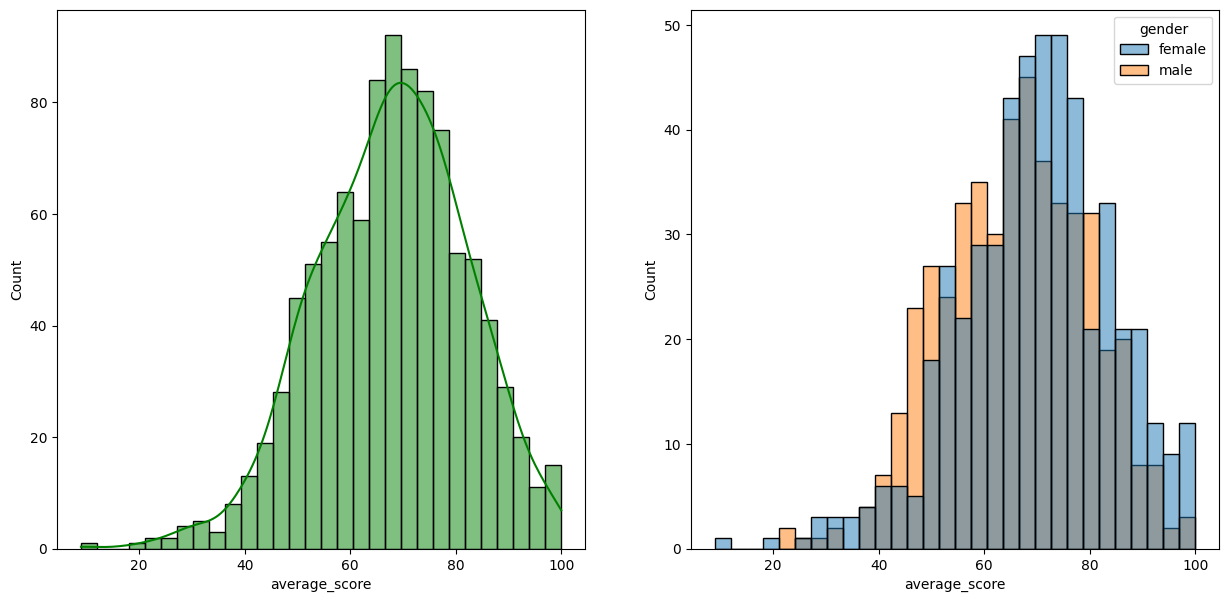

In [16]:
fig, axs = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'average_score',bins=30, kde = True,color='g')
plt.subplot(122)
sns.histplot(data = df, x = 'average_score',bins=30,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

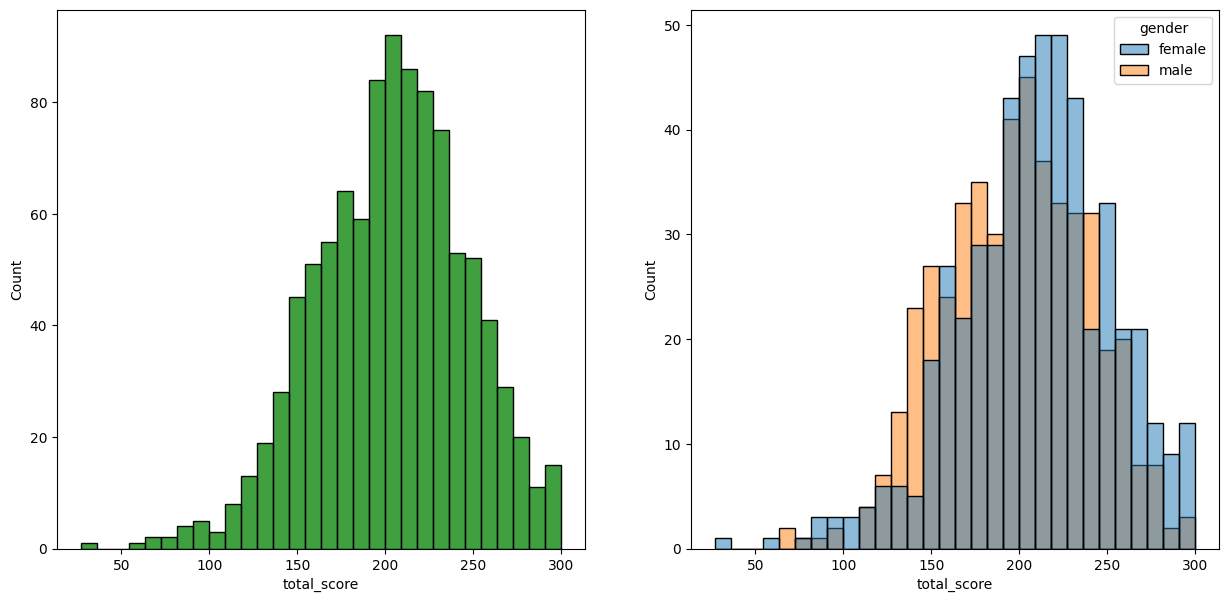

In [17]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins = 30,color='g')
plt.subplot(122)
sns.histplot(data = df,x='total_score',bins=30,hue='gender')

### The plots shows that females are performing better

<Axes: xlabel='average_score', ylabel='Count'>

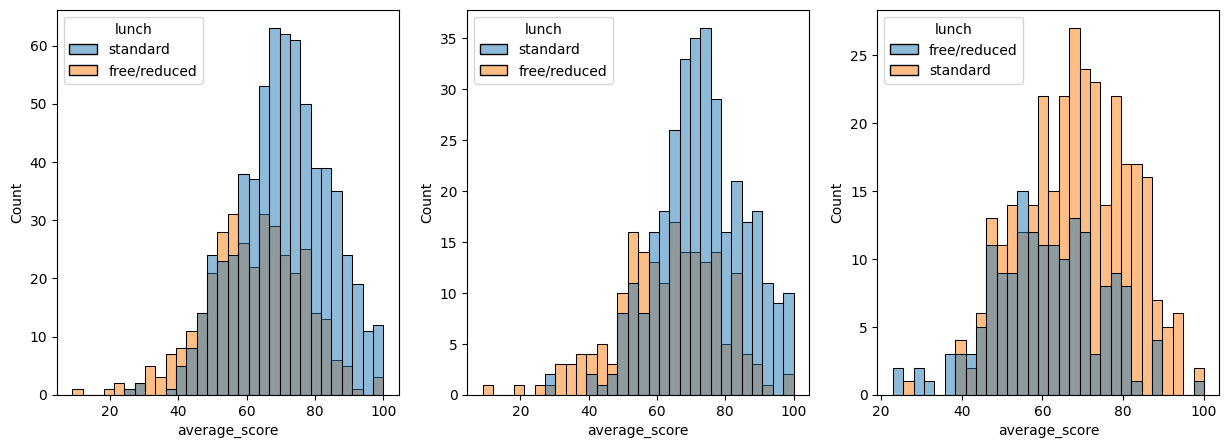

In [18]:
fig, axs = plt.subplots(1,3,figsize = (15,5))
plt.subplot(131)
sns.histplot(data=df,x='average_score',bins = 30,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender =='female'],x = 'average_score',bins=30,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender =='male'],x='average_score',bins=30,hue='lunch')

### The plots shows that the standard lunch is better as compared to free and reduced lunch

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "associate's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, 'high school'),
  Text(3, 0, "master's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, 'some high school')])

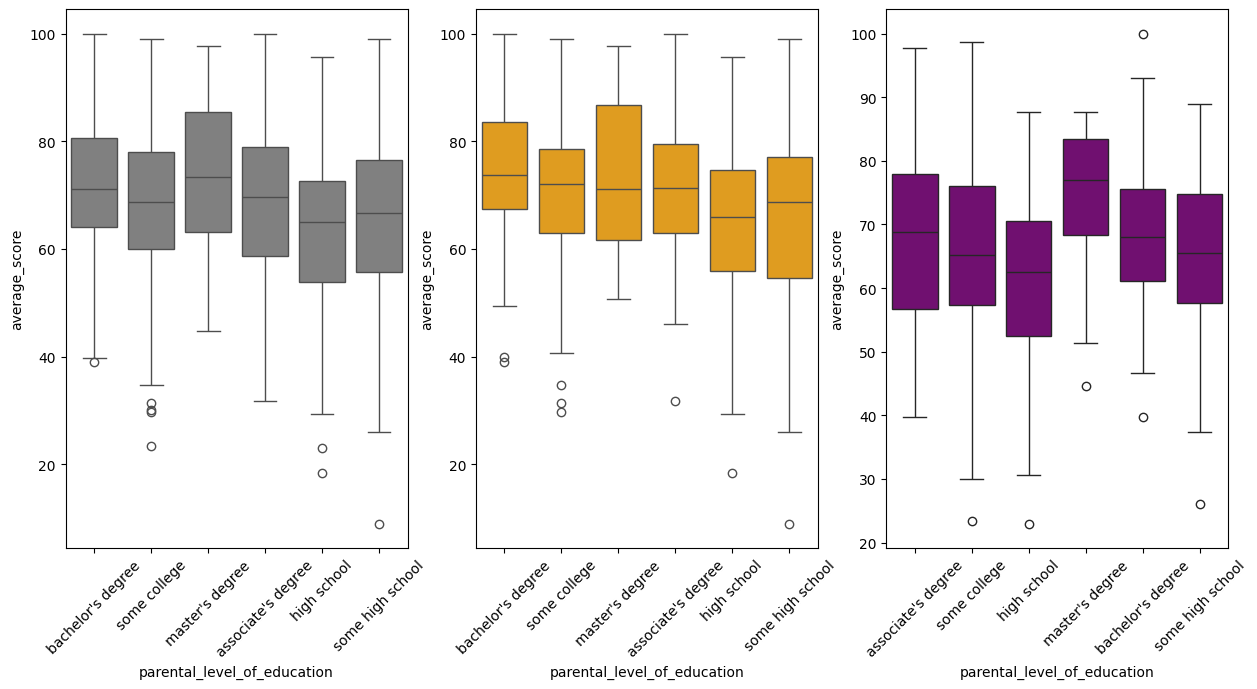

In [19]:
fig, axs = plt.subplots(1,3,figsize= (15,7))
plt.subplot(131)
sns.boxplot(data=df, x='parental_level_of_education', y='average_score',color='grey')
plt.xticks(rotation=45) 
plt.subplot(132)
sns.boxplot(data=df[df.gender == 'female'], x='parental_level_of_education', y='average_score',color='orange')
plt.xticks(rotation=45) 
plt.subplot(133)
sns.boxplot(data=df[df.gender == 'male'], x='parental_level_of_education', y='average_score',color='purple')
plt.xticks(rotation=45) 

Insights -
The plot show that the parental education don not have any significant effect on the students score.
The plot also show that students with parents having master's degree score more in exams in case.

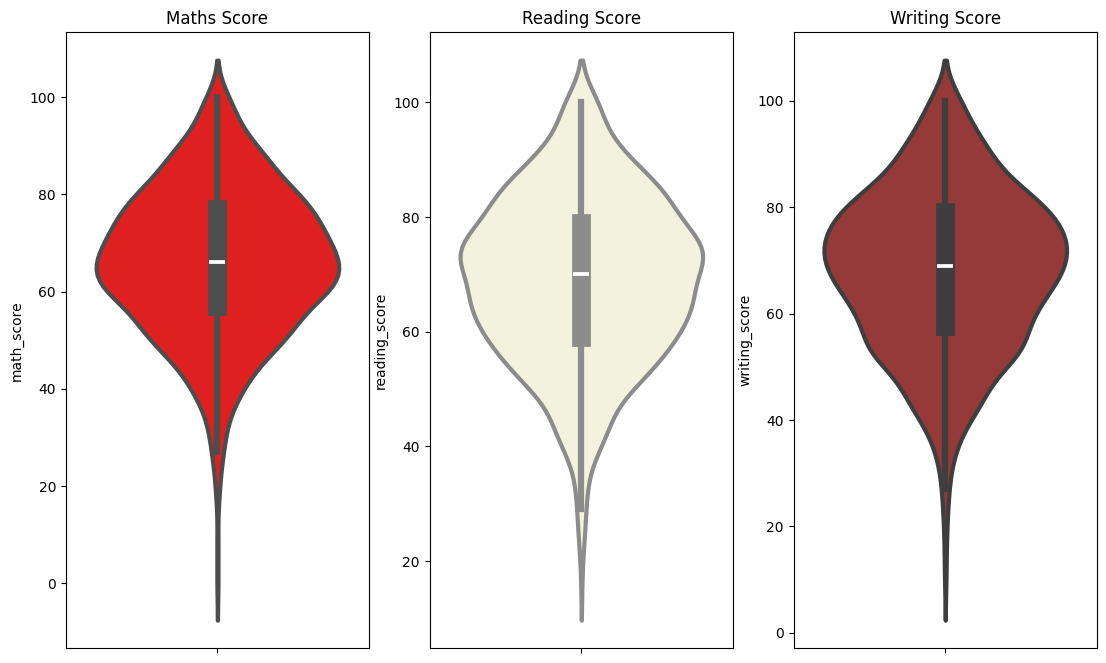

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Maths Score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(data=df,y='reading_score',color='beige',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(data=df,y='writing_score',color='brown',linewidth = 3)
plt.show()

#### From the above plots its clearly visible that most of the students score between 60 - 80 marks

In [21]:
df['parental_level_of_education'].unique().sum()

"bachelor's degreesome collegemaster's degreeassociate's degreehigh schoolsome high school"

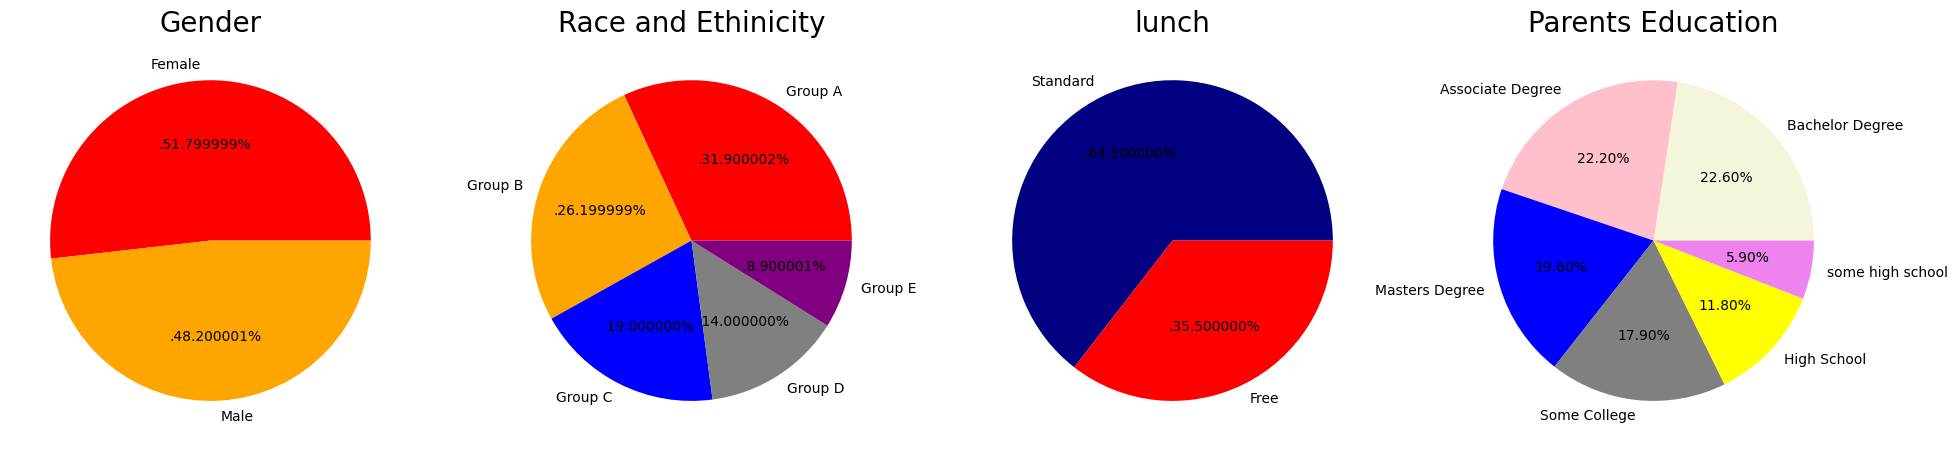

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','orange']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group A', 'Group B','Group C','Group D','Group E'
color = ['red','orange','blue','grey','purple']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Race and Ethinicity', fontsize = 20)
plt.axis('off')
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['navy','red']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['parental_level_of_education'].value_counts()
labels = 'Bachelor Degree', 'Associate Degree', 'Masters Degree','Some College','High School','some high school'
color = ['beige','pink','blue','grey','yellow','violet']

plt.pie(size,colors = color,labels=labels,autopct='%.2f%%')
plt.title('Parents Education',fontsize = 20)
plt.axis('off')
plt.rcParams['figure.figsize'] = (30,12)


### Feature wise visualization

### Gender Column

### UNIVARIATE Analysis

1. How the gender is distributed.
2. Is gender having any impact on students performance.

C:\Users\rohit\AppData\Local\Temp\ipykernel_3504\607784655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


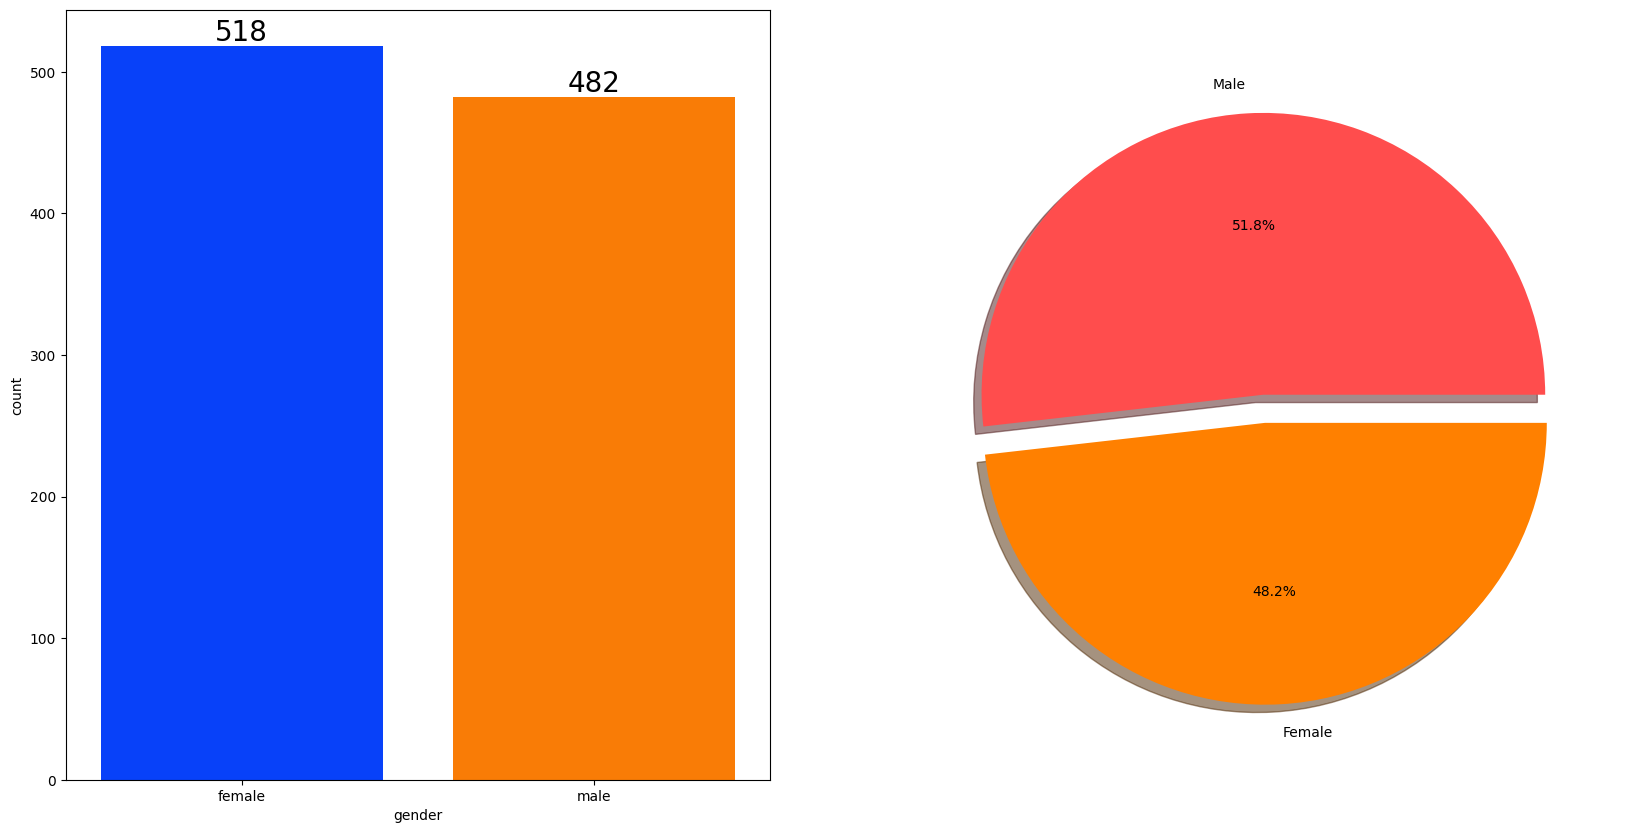

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
 ax[0].bar_label(container,color='black',size=20)
plt.subplot(122)    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### BIVARIATE Analysis



In [27]:
# gender_group = df.groupby('gender').mean()
numeric_cols = df.select_dtypes(include='number').columns
gender_group = df.groupby('gender')[numeric_cols].mean()
gender_group


,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


C:\Users\rohit\AppData\Local\Temp\ipykernel_3504\1256805638.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_score = [gender_group['average_score'][0],gender_group['math_score'][0]]
C:\Users\rohit\AppData\Local\Temp\ipykernel_3504\1256805638.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_score = [gender_group['average_score'][1],gender_group['math_score'][1]]


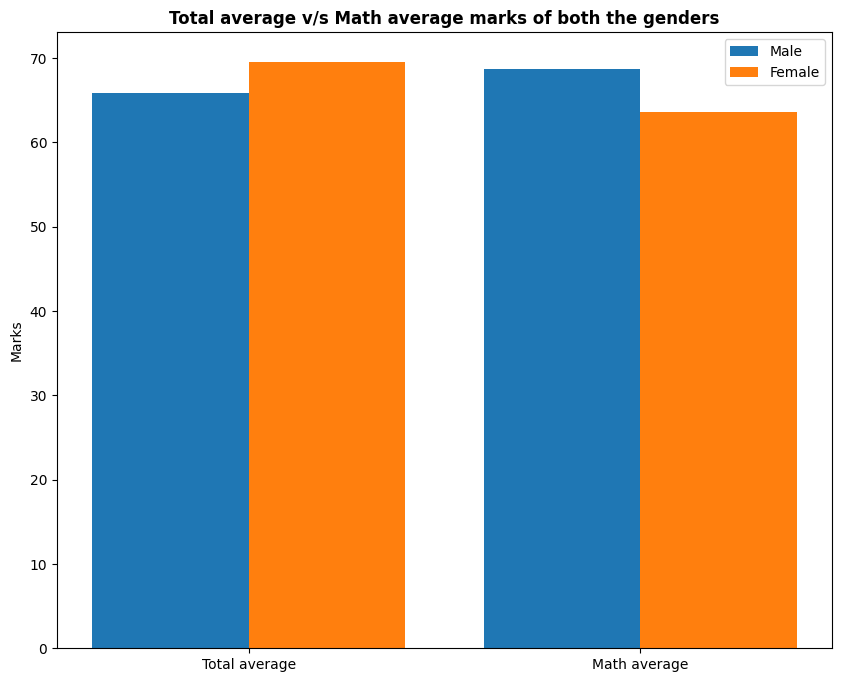

In [28]:
plt.figure(figsize=(10,8))

x = ['Total average','Math average']

female_score = [gender_group['average_score'][0],gender_group['math_score'][0]]
male_score = [gender_group['average_score'][1],gender_group['math_score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2,male_score,0.4,label = 'Male')
plt.bar(x_axis + 0.2,female_score,0.4,label = 'Female')

plt.xticks(x_axis, x)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights -
The bar plots show that the Total average score of female is greater and the math average score of male is greater 

### Race/Ethinicity Column

### UNIVARITE Analysis

C:\Users\rohit\AppData\Local\Temp\ipykernel_3504\190628320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['race_ethnicity'],data=df,ax=ax[0],palette='bright',saturation=0.95)


([<matplotlib.patches.Wedge at 0x1ea9e595250>,
 [Text(0.6461720141062023, 1.0111684964366394, 'group C'),
  Text(-1.0461621541481756, 0.33991873621212615, 'group D'),
  Text(-0.49322161839826323, -0.9832255260847321, 'group B'),
  Text(0.5952332509117034, -0.9250391218803047, 'group E'),
  Text(1.0572819245745813, -0.30357030811307883, 'group A')],
 [Text(0.3769336748952847, 0.5898482895880396, '31.9%'),
  Text(-0.5706339022626412, 0.1854102197520688, '26.2%'),
  Text(-0.2690299736717799, -0.5363048324098538, '19.0%'),
  Text(0.3246726823154745, -0.5045667937528934, '14.0%'),
  Text(0.5766992315861351, -0.16558380442531573, '8.9%')])

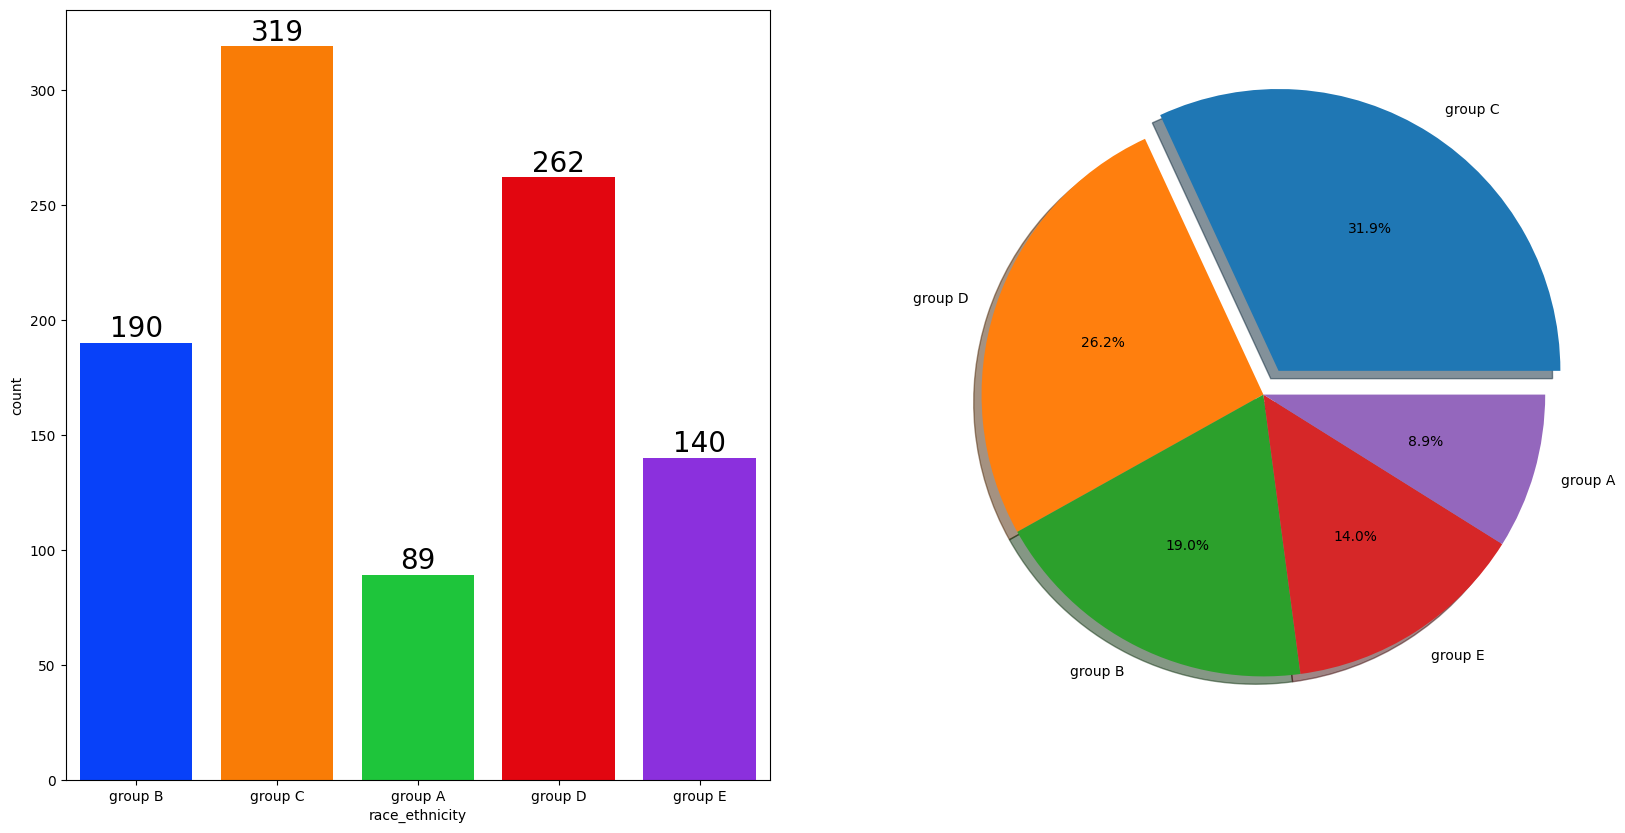

In [35]:
f,ax = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(x = df['race_ethnicity'],data=df,ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.subplot(122)
plt.pie(x =df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)

### BIVARIATE ANALYSIS


In [44]:
race_group = df.groupby('race_ethnicity')

C:\Users\rohit\AppData\Local\Temp\ipykernel_3504\2948567937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_group['math_score'].mean().index,y=race_group['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\rohit\AppData\Local\Temp\ipykernel_3504\2948567937.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = race_group['reading_score'].mean().index,y = race_group['reading_score'].mean().values,palette='bright',ax= ax[1])
C:\Users\rohit\AppData\Local\Temp\ipykernel_3504\2948567937.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

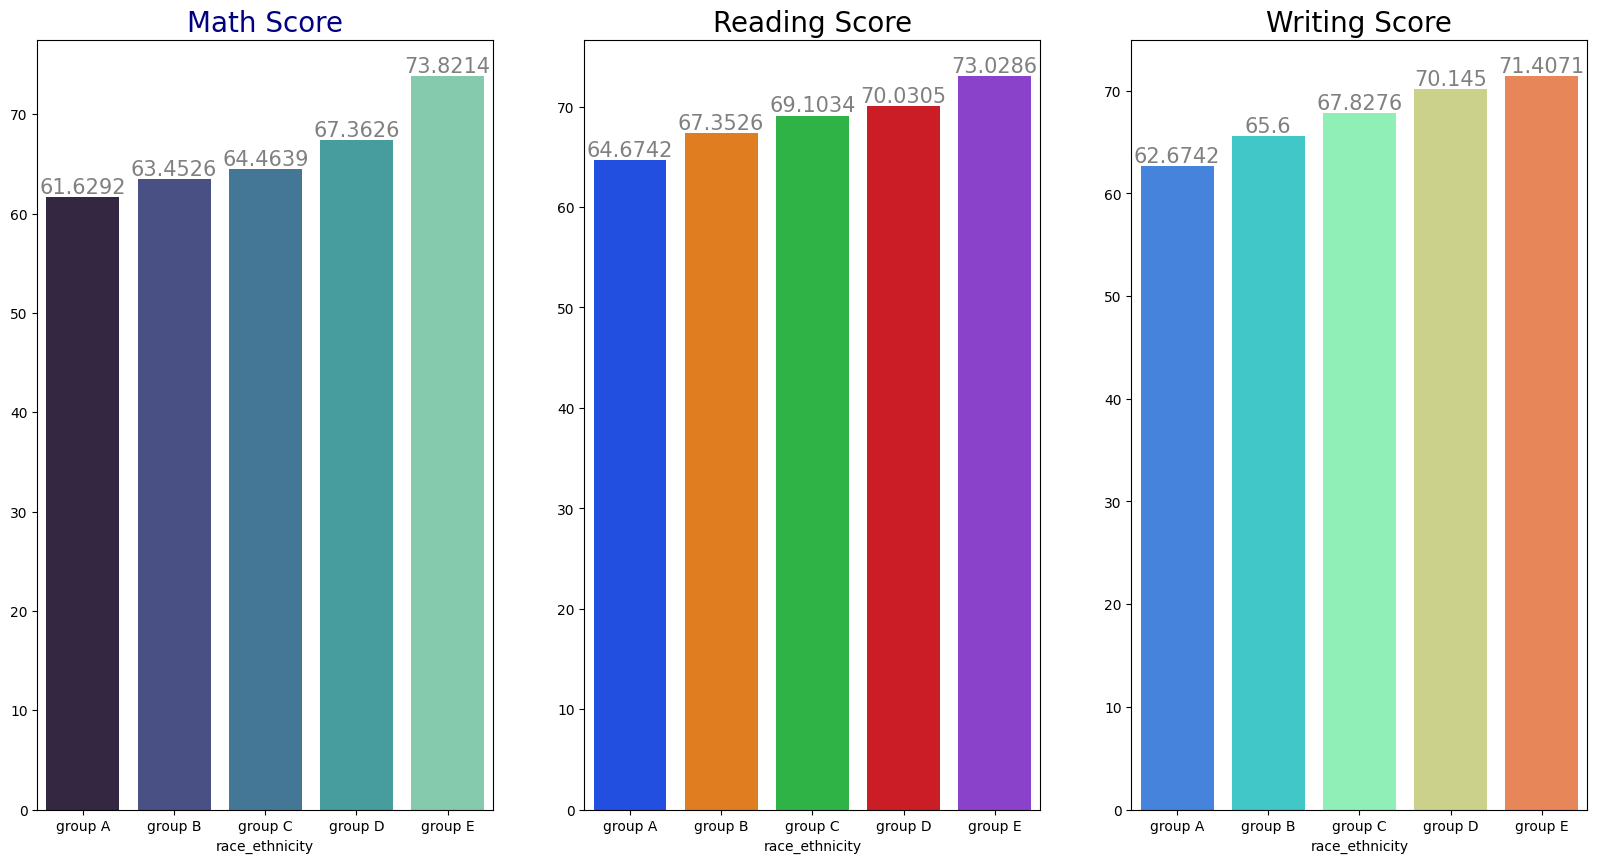

In [49]:
f,ax = plt.subplots(1,3,figsize=(20,10))
sns.barplot(x=race_group['math_score'].mean().index,y=race_group['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math Score',color = 'navy',size = 20)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'grey',size= 15)

sns.barplot(x = race_group['reading_score'].mean().index,y = race_group['reading_score'].mean().values,palette='bright',ax= ax[1])
ax[1].set_title('Reading Score',color = 'black',size = 20)
for container in ax[1].containers:
    ax[1].bar_label(container,color = 'grey',size = 15)

sns.barplot(x = race_group['writing_score'].mean().index,y = race_group['writing_score'].mean().values,palette='rainbow',ax= ax[2])
ax[2].set_title('Writing Score',color = 'black',size = 20)
for container in ax[2].containers:
    ax[2].bar_label(container,color = 'grey',size = 15)



Insights - 
1. The Group E have the highest average score in all.
2. The Group A have the lowest average score in all.

### Parental Level Education

C:\Users\rohit\AppData\Local\Temp\ipykernel_3504\2339245027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['parental_level_of_education'],palette='Blues')


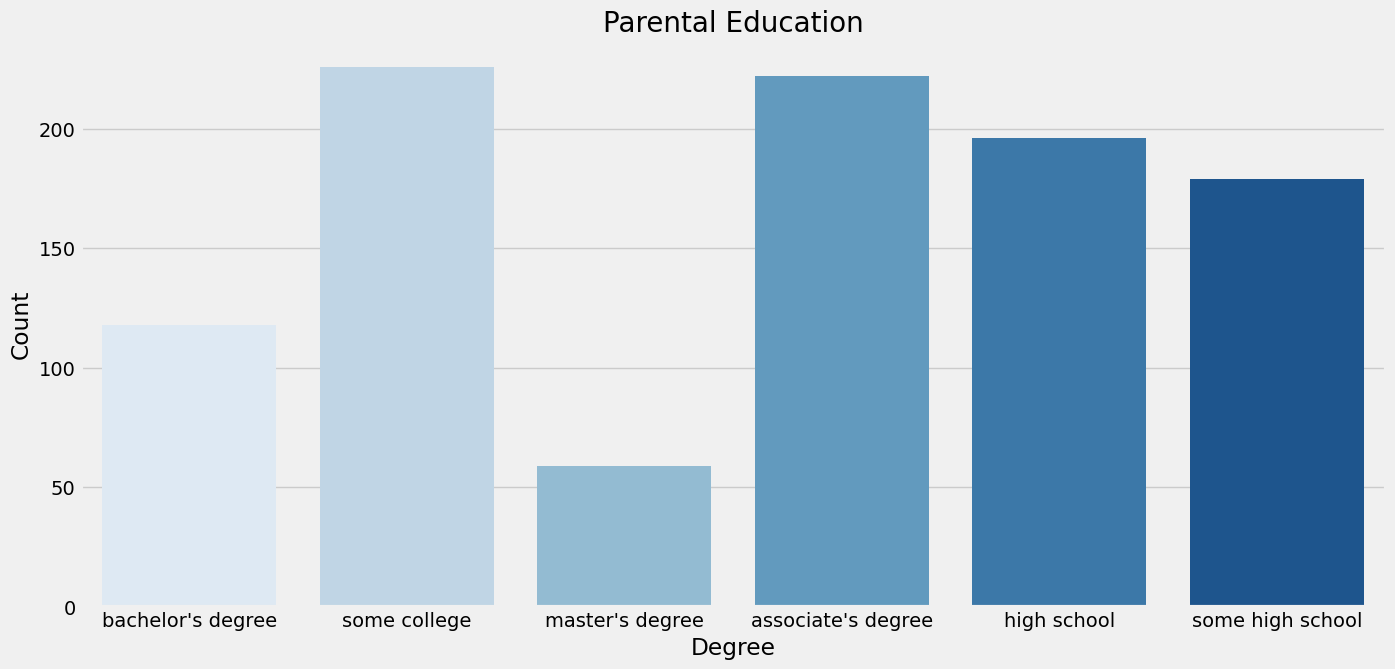

In [54]:
plt.rcParams['figure.figsize'] = (15,7)
sns.countplot(data=df,x=df['parental_level_of_education'],palette='Blues')
plt.title('Parental Education',fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

### Insights - 
Most of the parents have degree from some college

### Bivariate Analysis

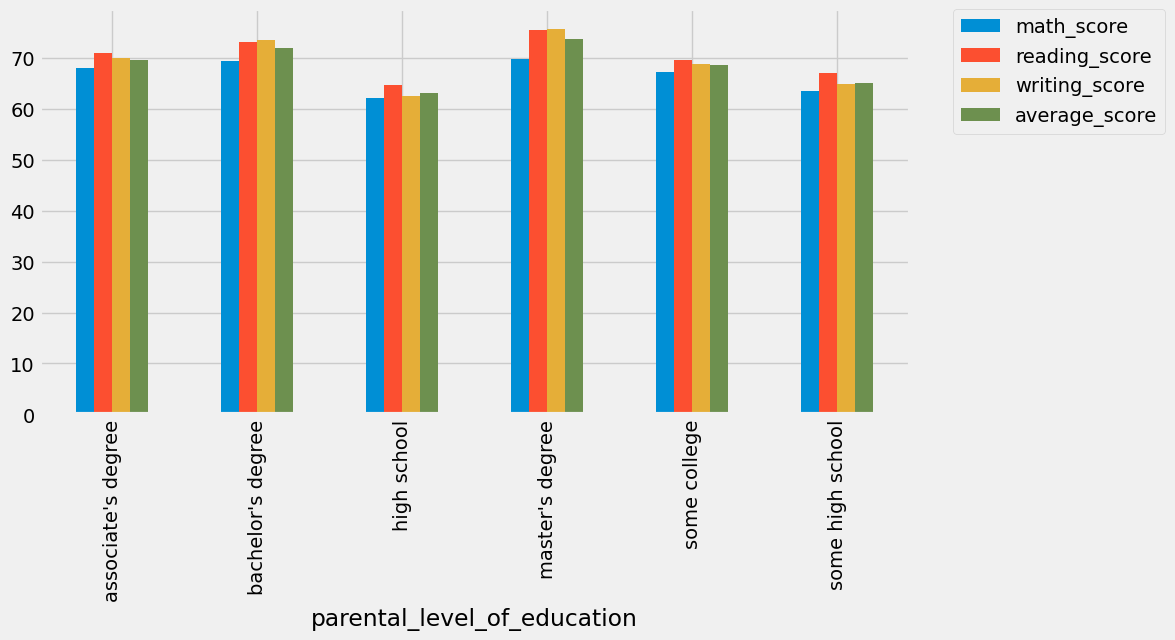

In [65]:
grp_1 = df.groupby('parental_level_of_education').mean(numeric_only=True).drop(columns=['total_score']).plot(kind='bar',figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


### UNIVARIATE ANALYSIS

C:\Users\rohit\AppData\Local\Temp\ipykernel_3504\2124458146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x = df['lunch'],palette='PuBu')


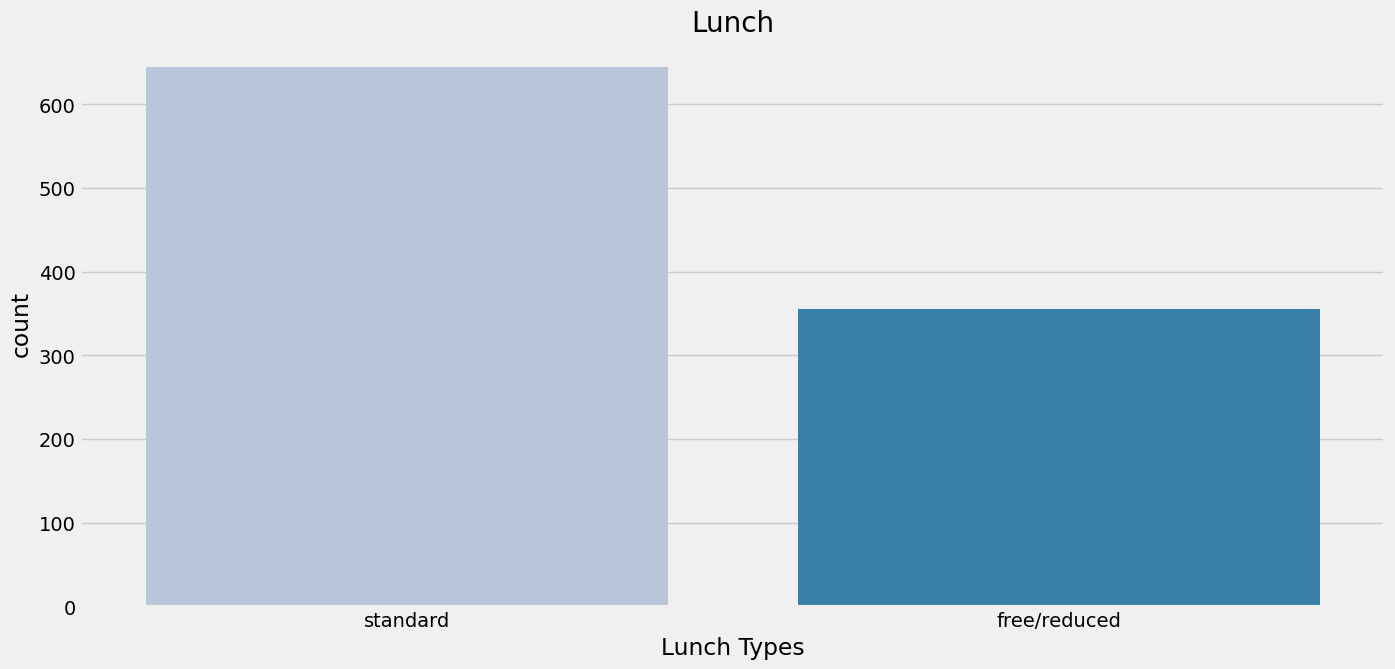

In [68]:
plt.rcParams['figure.figsize'] = (15,7)

sns.countplot(data=df,x = df['lunch'],palette='PuBu')
plt.title('Lunch',fontweight = 30,fontsize = 20)
plt.xlabel('Lunch Types')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more marks than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

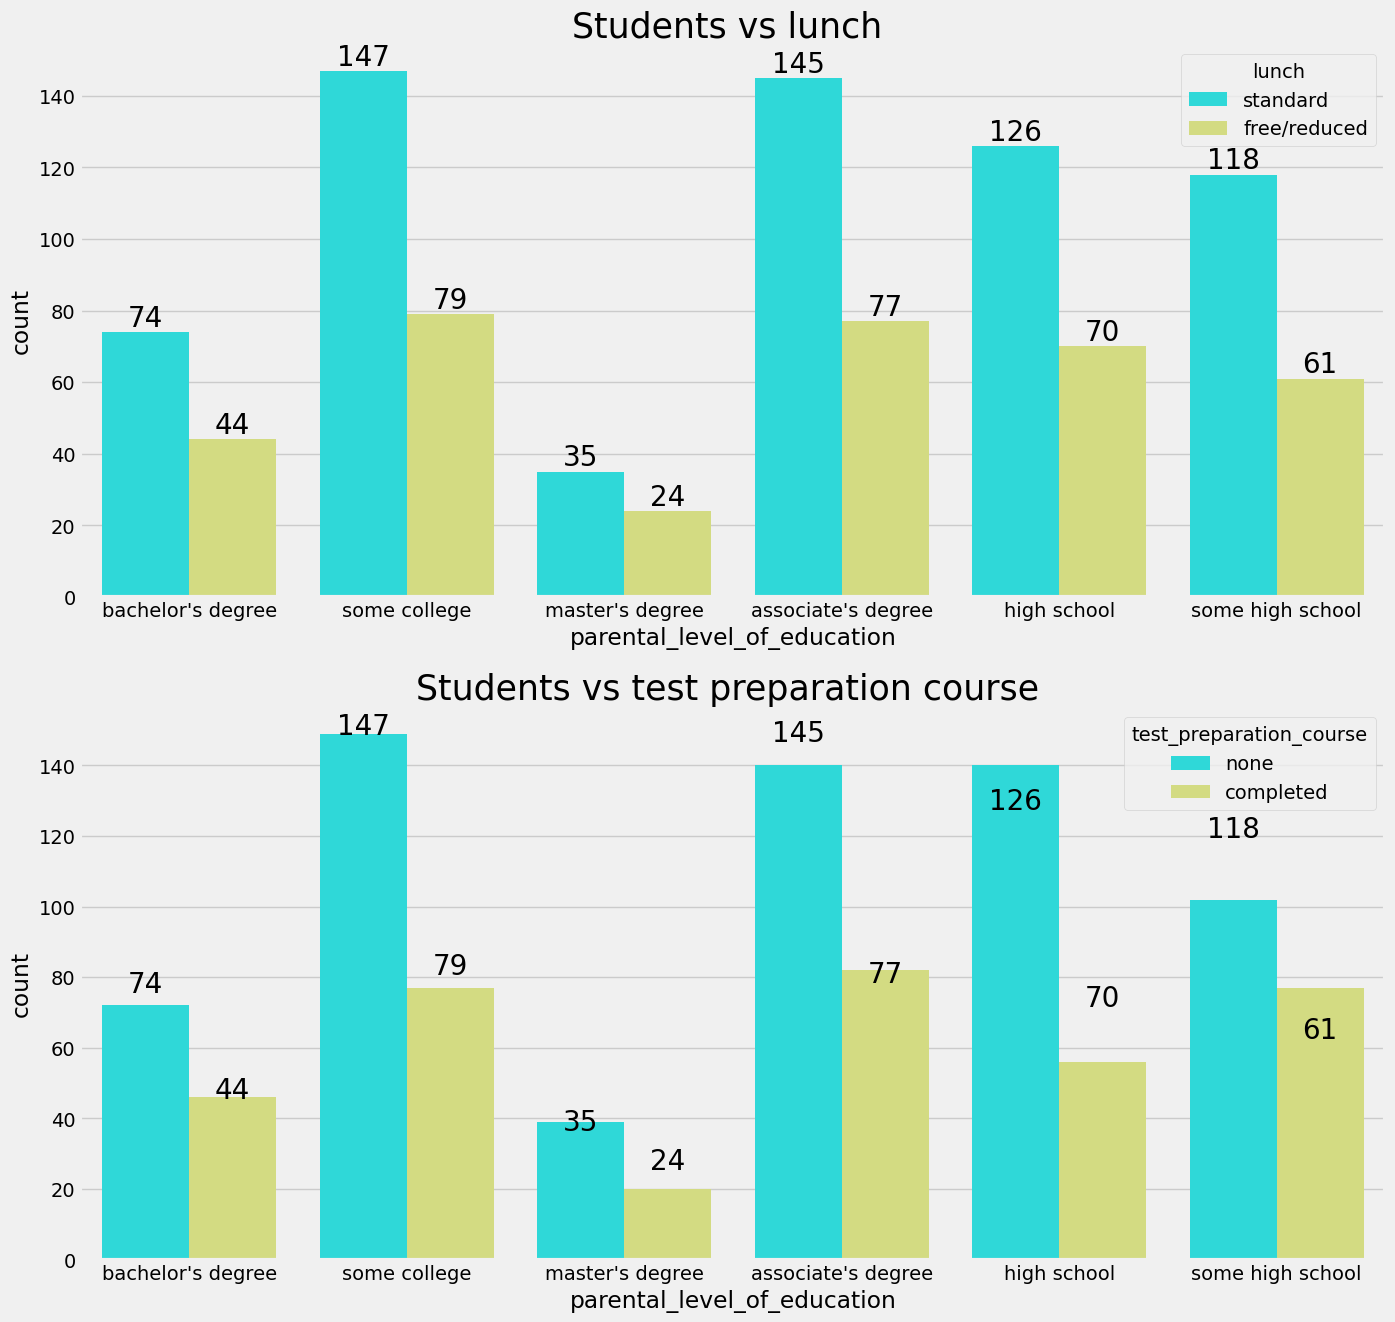

In [77]:
f, ax = plt.subplots(2,1,figsize = (15,15))
sns.countplot(data=df,x=df['parental_level_of_education'],hue='lunch',palette='rainbow',saturation=0.95,ax = ax[0] )
ax[0].set_title('Students vs lunch ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size = 20)
sns.countplot(data=df,x=df['parental_level_of_education'],hue='test_preparation_course',palette='rainbow',saturation=0.95,ax = ax[1] )
ax[1].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[1].bar_label(container,color = 'black',size = 20)



### Insights 

students with standard lunch are performing better

#### TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing_score'>

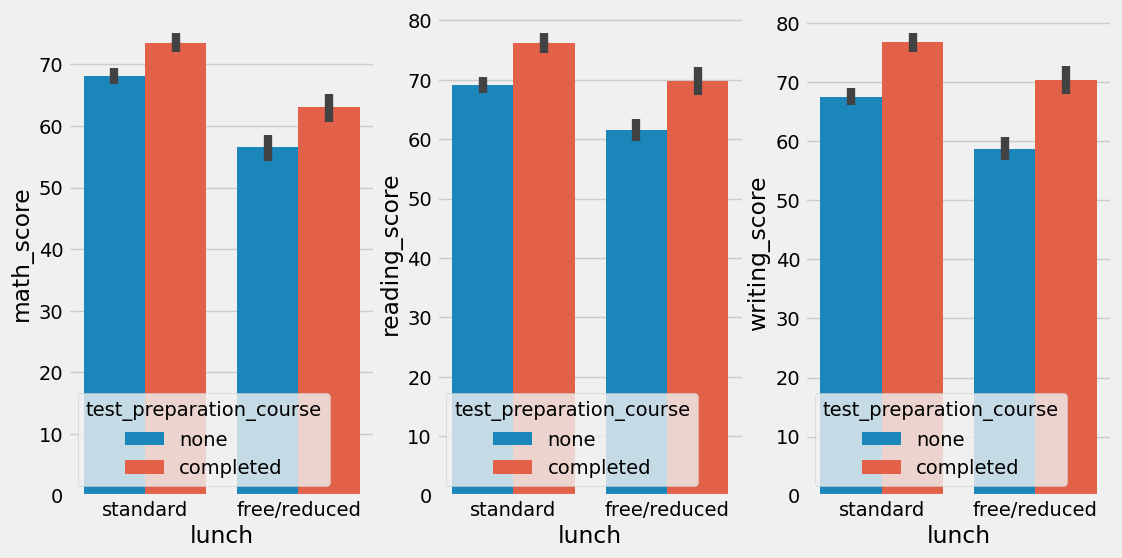

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

In [78]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

####  CHECKING OUTLIERS

<Axes: ylabel='average_score'>

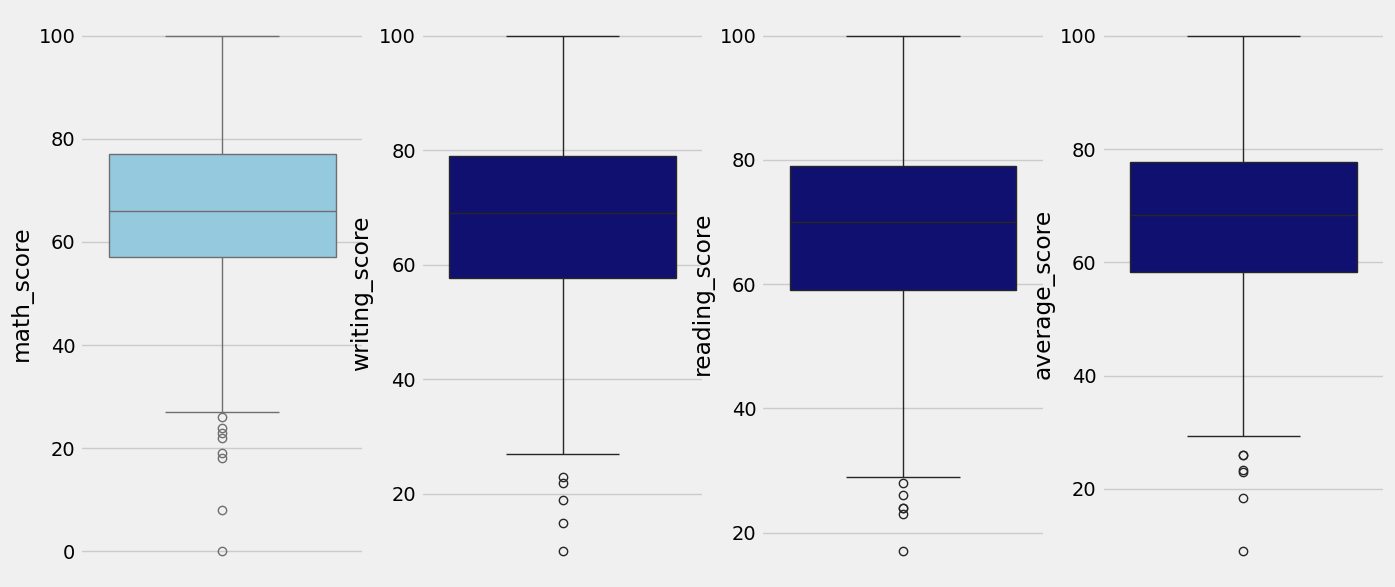

In [87]:
plt.subplots(1,4,figsize = (15,7))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['writing_score'],color ='navy')
plt.subplot(143)
sns.boxplot(df['reading_score'],color ='navy')
plt.subplot(144)
sns.boxplot(df['average_score'],color ='navy')



#### MUTIVARIATE ANALYSIS USING PAIRPLOT

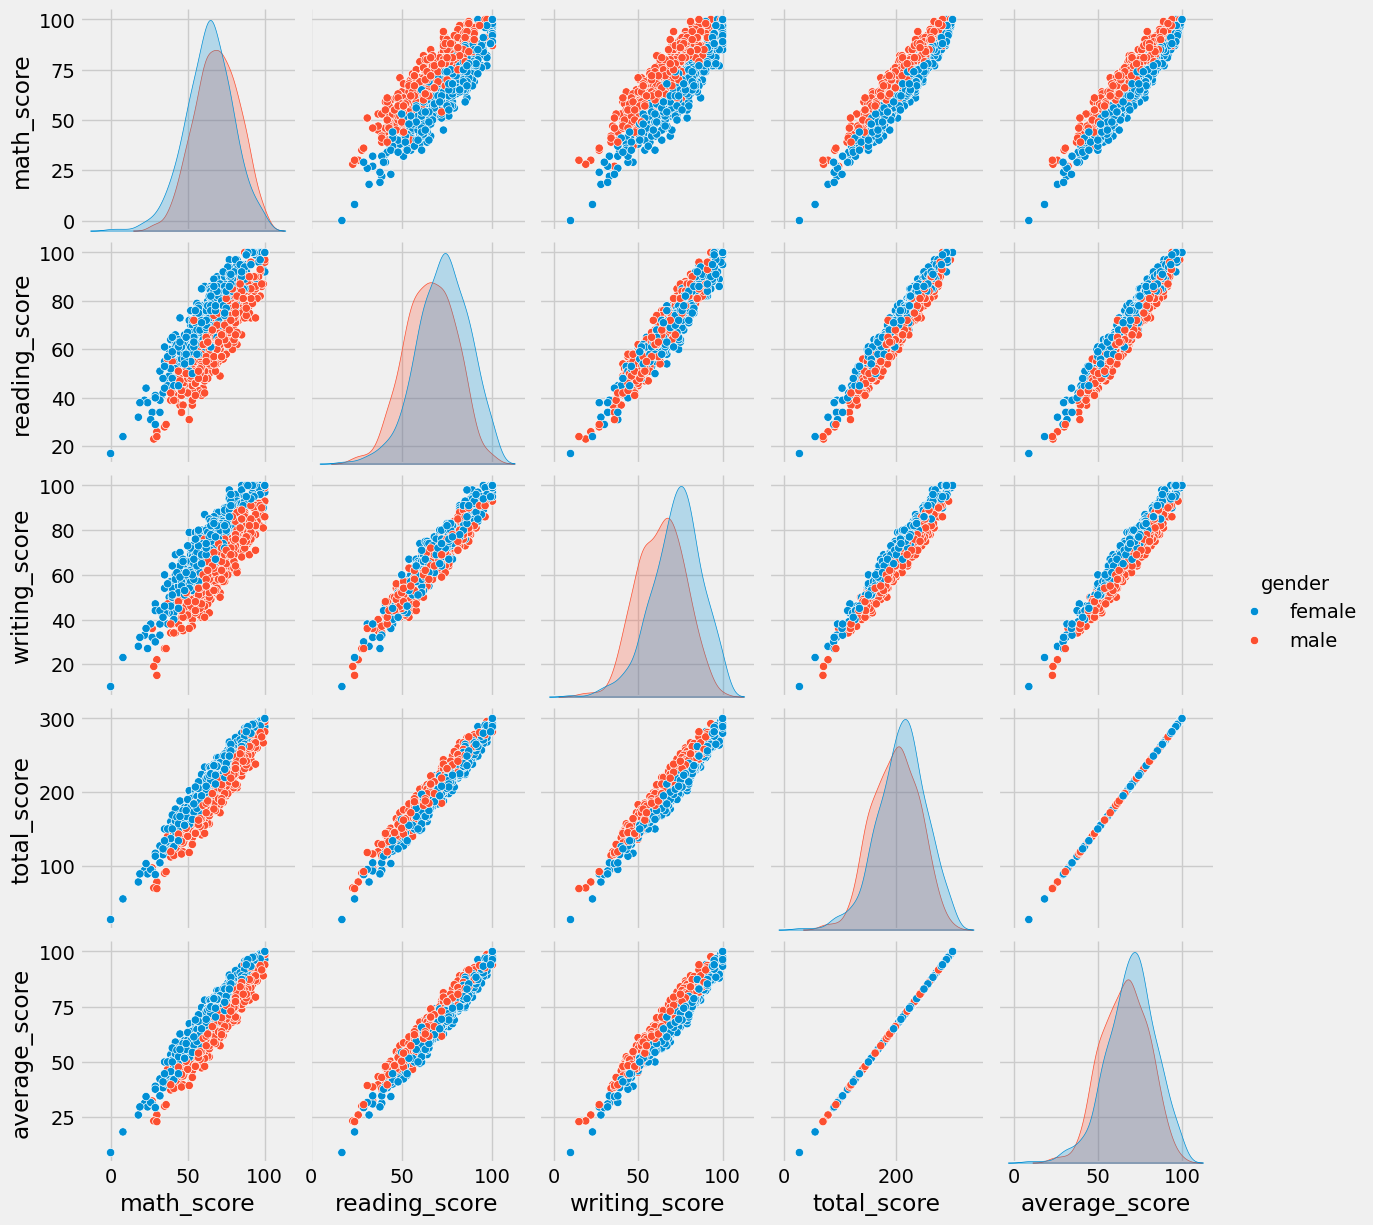

In [88]:
sns.pairplot(df,hue='gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.